In [23]:
# Presentation : https://github.com/Reddy7860/Heroku-ml-deployment/blob/main/Week2%20Presentation.pptx 
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the data

Cab_Data = pd.read_csv("DataSets/Cab_Data.csv")
City_Data = pd.read_csv("DataSets/City.csv")
Customer_Data =pd.read_csv("DataSets/Customer_ID.csv")
Transaction_Data =  pd.read_csv("DataSets/Transaction_ID.csv")

In [3]:
Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
City_Data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [5]:
Customer_Data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [6]:
Transaction_Data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [7]:
# check the shape of the dataset
print('Shape of Cab_Data:', Cab_Data.shape)
print('Shape of City_Data:', City_Data.shape)
print('Shape of Customer_Data:', Customer_Data.shape)
print('Shape of Transaction_Data:', Transaction_Data.shape)

Shape of Cab_Data: (359392, 7)
Shape of City_Data: (20, 3)
Shape of Customer_Data: (49171, 4)
Shape of Transaction_Data: (440098, 3)


In [8]:
# check the data types of the columns
print(Cab_Data.dtypes)
print(City_Data.dtypes)
print(Customer_Data.dtypes)
print(Transaction_Data.dtypes)

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object
City          object
Population    object
Users         object
dtype: object
Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object
Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object


In [9]:
# check for missing values
print(Cab_Data.isnull().sum())
print(City_Data.isnull().sum())
print(Customer_Data.isnull().sum())
print(Transaction_Data.isnull().sum())

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64
City          0
Population    0
Users         0
dtype: int64
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


In [10]:
# check for duplicates
print('Number of duplicates Cab_Data:', Cab_Data.duplicated().sum())
print('Number of duplicates City_Data:', City_Data.duplicated().sum())
print('Number of duplicates Customer_Data:', Customer_Data.duplicated().sum())
print('Number of duplicates Transaction_Data:', Transaction_Data.duplicated().sum())

Number of duplicates Cab_Data: 0
Number of duplicates City_Data: 0
Number of duplicates Customer_Data: 0
Number of duplicates Transaction_Data: 0


In [11]:
# check for unique values
print(Cab_Data.nunique())
print(City_Data.nunique())
print(Customer_Data.nunique())
print(Transaction_Data.nunique())


Transaction ID    359392
Date of Travel      1095
Company                2
City                  19
KM Travelled         874
Price Charged      99176
Cost of Trip       16291
dtype: int64
City          20
Population    20
Users         20
dtype: int64
Customer ID           49171
Gender                    2
Age                      48
Income (USD/Month)    23341
dtype: int64
Transaction ID    440098
Customer ID        49171
Payment_Mode           2
dtype: int64


In [12]:
# check for summary statistics
print(Cab_Data.describe())
print(City_Data.describe())
print(Customer_Data.describe())
print(Transaction_Data.describe())

       Transaction ID  Date of Travel   KM Travelled  Price Charged  \
count    3.593920e+05   359392.000000  359392.000000  359392.000000   
mean     1.022076e+07    42964.067998      22.567254     423.443311   
std      1.268058e+05      307.467197      12.233526     274.378911   
min      1.000001e+07    42371.000000       1.900000      15.600000   
25%      1.011081e+07    42697.000000      12.000000     206.437500   
50%      1.022104e+07    42988.000000      22.440000     386.360000   
75%      1.033094e+07    43232.000000      32.960000     583.660000   
max      1.044011e+07    43465.000000      48.000000    2048.030000   

        Cost of Trip  
count  359392.000000  
mean      286.190113  
std       157.993661  
min        19.000000  
25%       151.200000  
50%       282.480000  
75%       413.683200  
max       691.200000  
               City   Population      Users
count            20           20         20
unique           20           20         20
top     NEW YORK NY  

In [13]:
# check for correlation
print(Cab_Data.corr())
print(City_Data.corr())
print(Customer_Data.corr())
print(Transaction_Data.corr())

                Transaction ID  Date of Travel  KM Travelled  Price Charged  \
Transaction ID        1.000000        0.993030     -0.001429      -0.052902   
Date of Travel        0.993030        1.000000     -0.001621      -0.055559   
KM Travelled         -0.001429       -0.001621      1.000000       0.835753   
Price Charged        -0.052902       -0.055559      0.835753       1.000000   
Cost of Trip         -0.003462       -0.004484      0.981848       0.859812   

                Cost of Trip  
Transaction ID     -0.003462  
Date of Travel     -0.004484  
KM Travelled        0.981848  
Price Charged       0.859812  
Cost of Trip        1.000000  
Empty DataFrame
Columns: []
Index: []
                    Customer ID       Age  Income (USD/Month)
Customer ID            1.000000 -0.006749           -0.006911
Age                   -0.006749  1.000000            0.000156
Income (USD/Month)    -0.006911  0.000156            1.000000
                Transaction ID  Customer ID
Transacti

In [14]:
# Feature transformation for Cab_Data

Cab_Data = pd.read_csv("DataSets/Cab_Data.csv")

# Convert the 'Date of Travel' column to numeric format
Cab_Data['Date of Travel'] = pd.to_numeric(Cab_Data['Date of Travel'], errors='coerce')

# Define a function to convert numeric date to datetime object
def date_transform(date_num):
    return pd.to_datetime('1899-12-30') + pd.to_timedelta(date_num, unit='D')

# Apply the date_transform function to the 'Date of Travel' column
Cab_Data['Date of Travel'] = Cab_Data['Date of Travel'].apply(date_transform)

Cab_Data['Date of Travel'] = pd.to_datetime(Cab_Data['Date of Travel'], format='%m/%d/%Y')
Cab_Data['Profit'] = Cab_Data['Price Charged'] - Cab_Data['Cost of Trip']
Cab_Data['Profit per KM'] = Cab_Data['Profit'] / Cab_Data['KM Travelled']
Cab_Data['Year'] = Cab_Data['Date of Travel'].dt.year
Cab_Data['Month'] = Cab_Data['Date of Travel'].dt.month
Cab_Data['Weekday'] = Cab_Data['Date of Travel'].dt.day_name()

# Feature transformation for Customer_Data
Customer_Data['Income Bracket'] = pd.cut(Customer_Data['Income (USD/Month)'], 
                                         bins=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000], 
                                         labels=['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k', '80k-90k', '90k-100k'])
Customer_Data['Age Bracket'] = pd.cut(Customer_Data['Age'], 
                                      bins=[0, 18, 25, 30, 35, 40, 45, 50, 55, 60, 200], 
                                      labels=['0-18', '18-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60+'])

# Feature transformation for Transaction_Data
Transaction_Data['Payment_Mode'] = np.where(Transaction_Data['Payment_Mode'] == 'Cash', 0, 1)

# Feature transformation for City_Data
City_Data['Population'] = City_Data['Population'].str.replace(',', '').astype(int)
City_Data['Users'] = City_Data['Users'].str.replace(',', '').astype(int)

In [15]:
# Count the number of data points in each dataset
cab_data_count = len(Cab_Data.index)
city_data_count = len(City_Data.index)
customer_data_count = len(Customer_Data.index)
transaction_data_count = len(Transaction_Data.index)

# Calculate the time period covered by the data
cab_data_start = Cab_Data["Date of Travel"].min()
cab_data_end = Cab_Data["Date of Travel"].max()

# Print the summary statistics
print("Cab_Data: {} data points, {} to {}".format(cab_data_count, cab_data_start, cab_data_end))
print("City_Data: {} data points".format(city_data_count))
print("Customer_Data: {} data points".format(customer_data_count))
print("Transaction_Data: {} data points".format(transaction_data_count))

Cab_Data: 359392 data points, 2016-01-02 00:00:00 to 2018-12-31 00:00:00
City_Data: 20 data points
Customer_Data: 49171 data points
Transaction_Data: 440098 data points


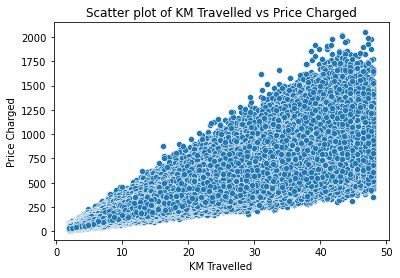

               KM Travelled  Price Charged
KM Travelled       1.000000       0.835753
Price Charged      0.835753       1.000000


In [24]:
# Hypothesis 1: There is a correlation between KM Travelled and Price Charged in Cab_Data.

# scatter plot of KM Travelled vs Price Charged
sns.scatterplot(x='KM Travelled', y='Price Charged', data=Cab_Data)
plt.title('Scatter plot of KM Travelled vs Price Charged')
plt.show()

# correlation matrix of KM Travelled and Price Charged
corr_matrix = Cab_Data[['KM Travelled', 'Price Charged']].corr()
print(corr_matrix)

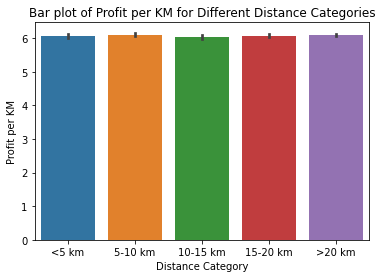

6.0914894853783705
6.062859557935478
6.110413731100869
6.0431638302449775
6.074654616899868


In [57]:
# Hypothesis 2: Profit per KM is higher for long-distance trips compared to short-distance trips in Cab_Data.

# create a new column for distance category
Cab_Data['Distance Category'] = pd.cut(Cab_Data['KM Travelled'], 
                                       bins=[0, 5, 10, 15, 20, 50], 
                                       labels=['<5 km', '5-10 km', '10-15 km', '15-20 km', '>20 km'])

# calculate profit per KM for each distance category
Cab_Data['Profit per KM'] = Cab_Data['Profit'] / Cab_Data['KM Travelled']

# bar plot of Profit per KM vs Distance Category
sns.barplot(x='Distance Category', y='Profit per KM', data=Cab_Data)
plt.title('Bar plot of Profit per KM for Different Distance Categories')
plt.show()


print(Cab_Data[Cab_Data['Distance Category'] == '>20 km']['Profit per KM'].mean())
print(Cab_Data[Cab_Data['Distance Category'] == '<5 km']['Profit per KM'].mean())
print(Cab_Data[Cab_Data['Distance Category'] == '5-10 km']['Profit per KM'].mean())
print(Cab_Data[Cab_Data['Distance Category'] == '10-15 km']['Profit per KM'].mean())
print(Cab_Data[Cab_Data['Distance Category'] == '15-20 km']['Profit per KM'].mean())


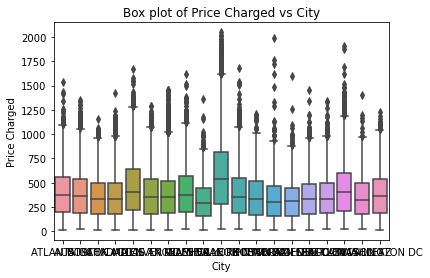

In [56]:
# Hypothesis 3: Companies charge different prices in different cities in Cab_Data.
    
# box plot of Price Charged vs City
sns.boxplot(x='City', y='Price Charged', data=Cab_Data)
plt.title('Box plot of Price Charged vs City')
plt.show()


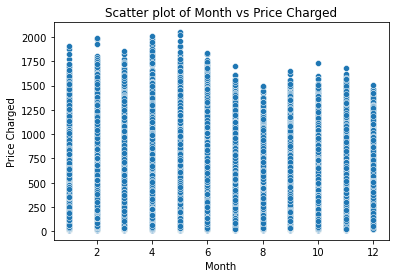

                  Month  Price Charged
Month          1.000000      -0.061116
Price Charged -0.061116       1.000000


In [55]:
# Hypothesis 4: There is a correlation between the month of travel and the price charged in Cab_Data.

# scatter plot of Month vs Price Charged
sns.scatterplot(x='Month', y='Price Charged', data=Cab_Data)
plt.title('Scatter plot of Month vs Price Charged')
plt.show()

# correlation matrix of Month and Price Charged
corr_matrix = Cab_Data[['Month', 'Price Charged']].corr()
print(corr_matrix)

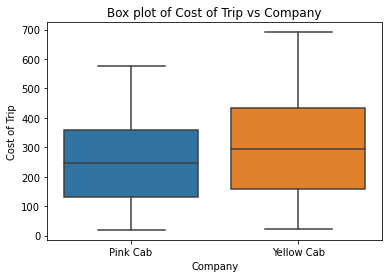

In [52]:
# Hypothesis 5: The cost of trip is higher for Pink Cab compared to Yellow Cab in Cab_Data.

# box plot of Cost of Trip vs Company
sns.boxplot(x='Company', y='Cost of Trip', data=Cab_Data)
plt.title('Box plot of Cost of Trip vs Company')
plt.show()

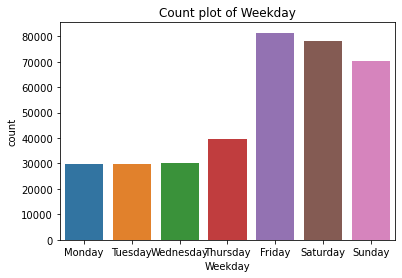

In [58]:
# Hypothesis 6: There is a correlation between the day of the week and the number of rides in Cab_Data.
# Set the order of the weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Count plot of Weekday
sns.countplot(x='Weekday', data=Cab_Data, order=weekday_order)
plt.title('Count plot of Weekday')
plt.show()

Text(0.5, 1.0, 'Line plot of rides vs month')

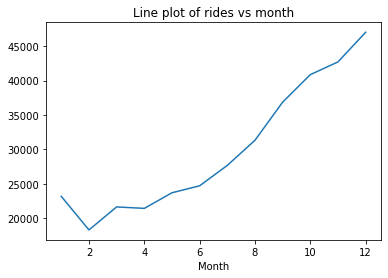

In [54]:
# Hypothesis 7: There is a seasonal trend in the number of rides taken throughout the year in Cab_Data.

# line plot of rides vs month
rides_per_month = Cab_Data.groupby('Month')['Transaction ID'].count()
sns.lineplot(x=rides_per_month.index, y=rides_per_month.values)
plt.title('Line plot of rides vs month')


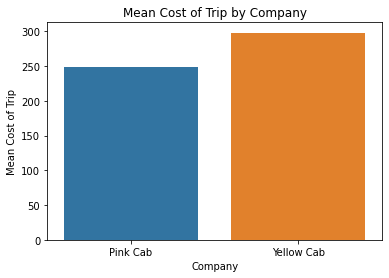

Difference in mean cost of trip between Pink Cab and Yellow Cab: -49.77332204447961


In [17]:
import pandas as pd
import numpy as np

# group the data by Company and calculate the mean cost of trip for each company
cost_by_company = Cab_Data.groupby('Company')['Cost of Trip'].mean()

# plot the results
sns.barplot(x=cost_by_company.index, y=cost_by_company.values)
plt.title('Mean Cost of Trip by Company')
plt.ylabel('Mean Cost of Trip')
plt.show()

# calculate the difference in mean cost of trip between Pink Cab and Yellow Cab
pink_mean_cost = cost_by_company['Pink Cab']
yellow_mean_cost = cost_by_company['Yellow Cab']
cost_diff = pink_mean_cost - yellow_mean_cost
print("Difference in mean cost of trip between Pink Cab and Yellow Cab:", cost_diff)


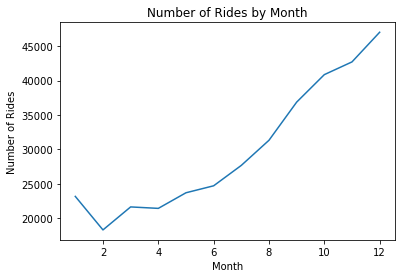

In [18]:
# group the data by month and count the number of rides for each month
rides_by_month = Cab_Data.groupby(Cab_Data['Date of Travel'].dt.month)['Transaction ID'].count()

# plot the results
sns.lineplot(x=rides_by_month.index, y=rides_by_month.values)
plt.title('Number of Rides by Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.show()


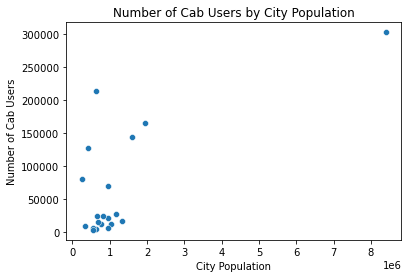

Correlation coefficient between city population and number of cab users: 0.7033818983284993


In [21]:
# convert Population and Users to numeric data types
City_Data['Population'] = City_Data['Population'].astype(str)
City_Data['Users'] = City_Data['Users'].astype(str)

City_Data['Population'] = pd.to_numeric(City_Data['Population'].str.replace(',', ''))
City_Data['Users'] = pd.to_numeric(City_Data['Users'].str.replace(',', ''))

# plot the relationship between population and number of users
sns.scatterplot(data=City_Data, x='Population', y='Users')
plt.title('Number of Cab Users by City Population')
plt.xlabel('City Population')
plt.ylabel('Number of Cab Users')
plt.show()

# calculate correlation coefficient
corr = City_Data['Population'].corr(City_Data['Users'])
print("Correlation coefficient between city population and number of cab users:", corr)


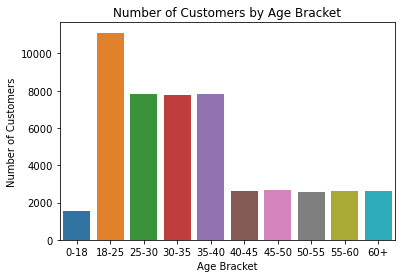

In [22]:
# create age brackets using pd.cut
Customer_Data['Age Bracket'] = pd.cut(Customer_Data['Age'], 
                                      bins=[0, 18, 25, 30, 35, 40, 45, 50, 55, 60, 200], 
                                      labels=['0-18', '18-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60+'])

# count the number of customers in each age bracket
customers_by_age = Customer_Data['Age Bracket'].value_counts()

# plot the results
sns.barplot(x=customers_by_age.index, y=customers_by_age.values)
plt.title('Number of Customers by Age Bracket')
plt.xlabel('Age Bracket')
plt.ylabel('Number of Customers')
plt.show()

# find the age bracket with the highest number
